# Breast Cancer detection using KNN & SVC

### Pyforest Lib

In [39]:
from pyforest import *
%matplotlib inline

In [52]:
lazy_imports()

['import sys',
 'from sklearn.manifold import TSNE',
 'from sklearn.ensemble import RandomForestRegressor',
 'import sklearn',
 'import spacy',
 'import pydot',
 'import plotly.express as px',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import awswrangler as wr',
 'import os',
 'import datetime as dt',
 'from openpyxl import load_workbook',
 'from pyspark import SparkContext',
 'import altair as alt',
 'from pathlib import Path',
 'import statistics',
 'import pickle',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import bokeh',
 'import tqdm',
 'import re',
 'import gensim',
 'import keras',
 'import xgboost as xgb',
 'from sklearn import svm',
 'import nltk',
 'import tensorflow as tf',
 'import dash',
 'import glob',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import RandomForestClassifier',
 'import plotly as py',
 'import lightgbm as lgb',
 'import matplotlib as mpl',
 'import

###  Data Reading

In [2]:
data = pd.read_csv("breastCancer.csv")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [5]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [6]:
df = data.replace('?', np.nan)

<IPython.core.display.Javascript object>

In [7]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df = df.fillna(df.median())

In [9]:
df['bare_nucleoli'].unique()

array(['1', '10', '2', '4', '3', '9', '7', 1.0, '5', '8', '6'],
      dtype=object)

In [10]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [11]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

### EDA

In [12]:
df.drop('id',axis=1,inplace=True)

In [13]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


#### Bivariate Analysis

<IPython.core.display.Javascript object>

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


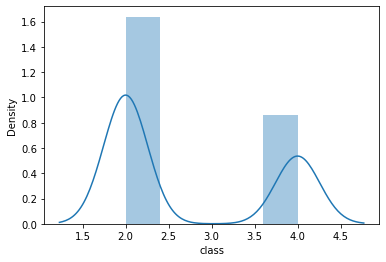

In [15]:
sns.distplot(df['class'])

#### Multivariate Analysis

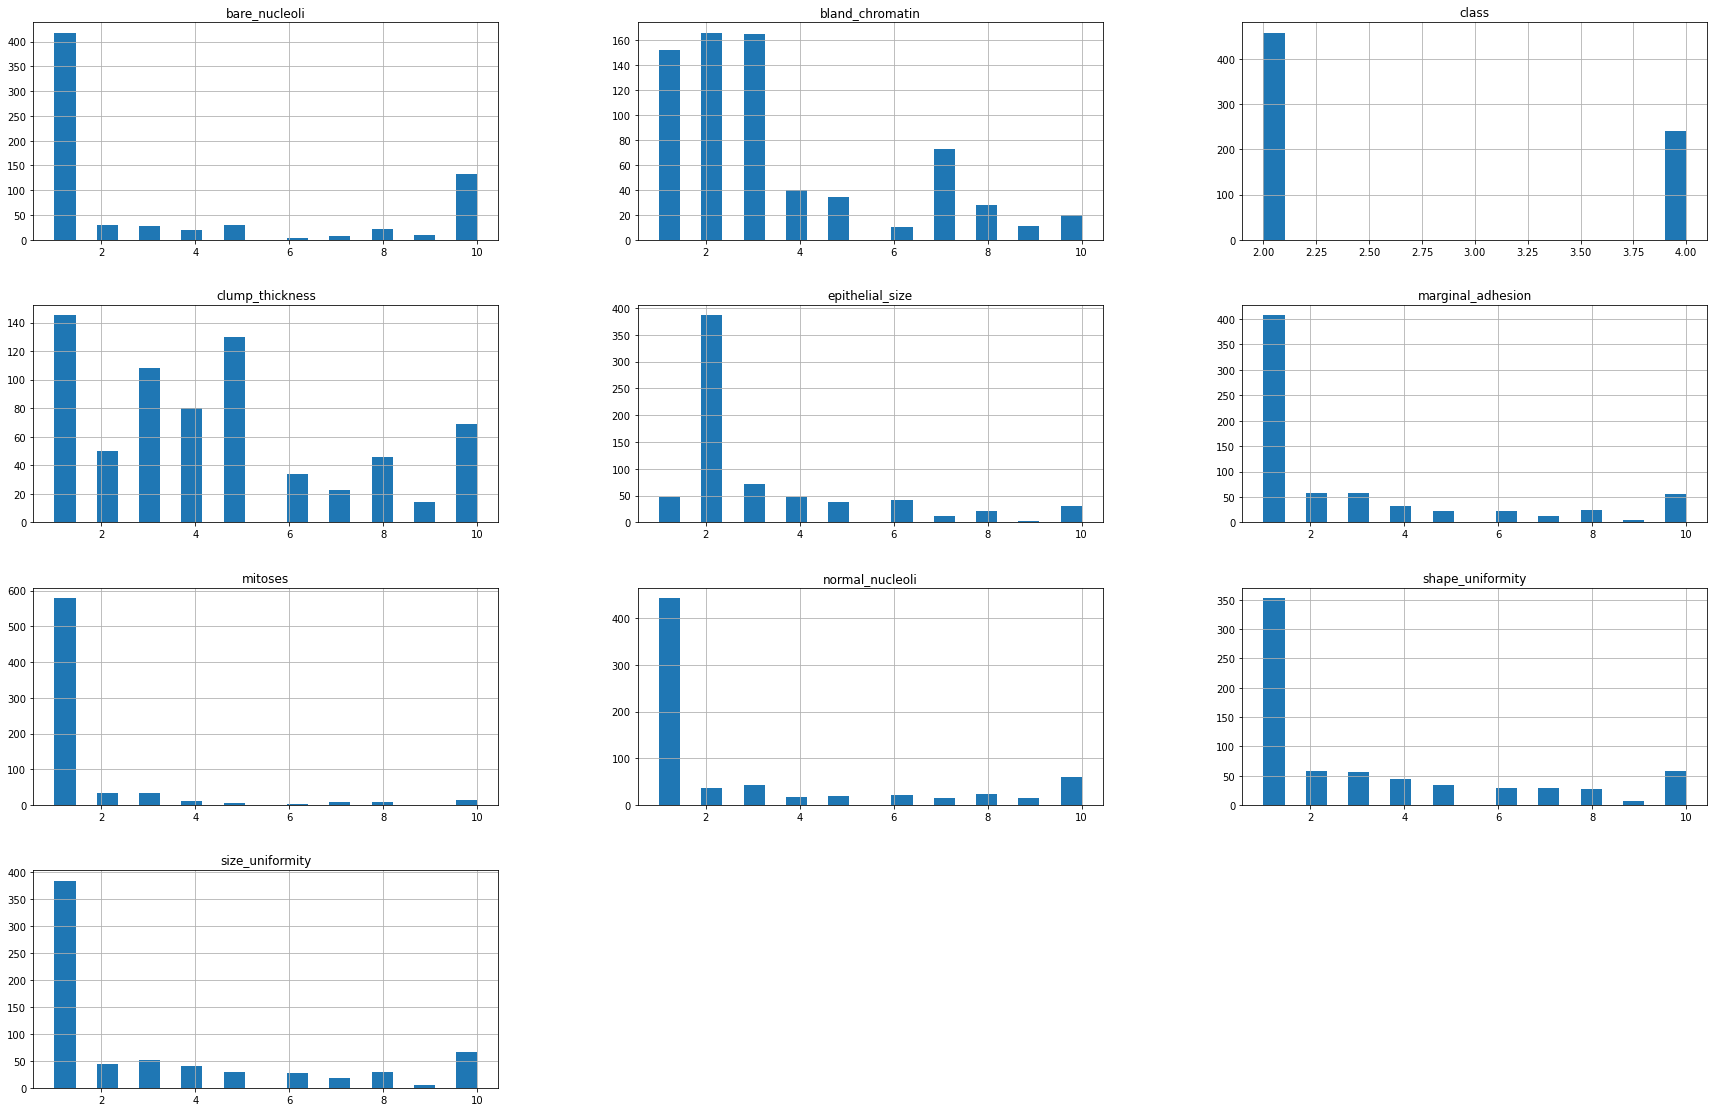

In [16]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

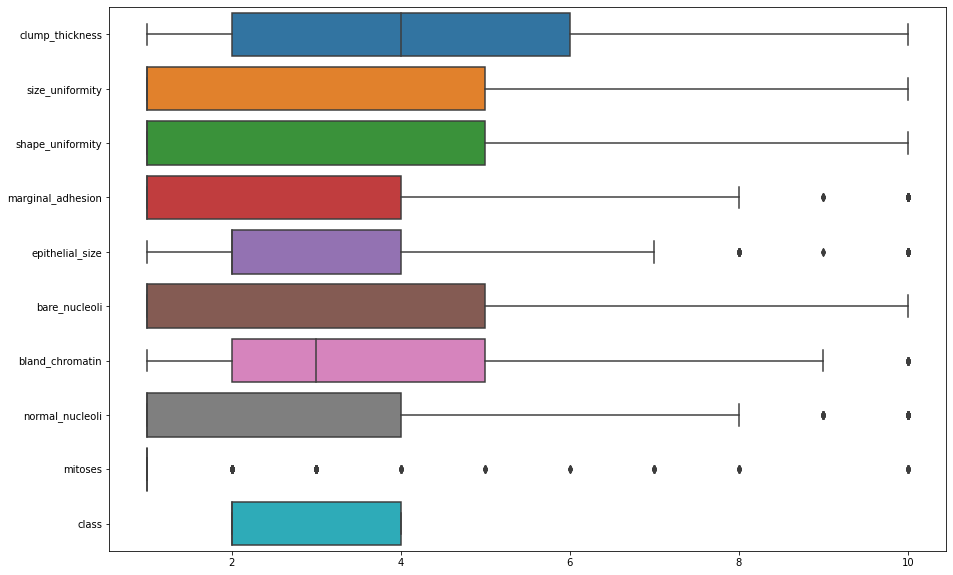

In [17]:
plt.figure(figsize=(15,10));
sns.boxplot(data=df,orient='h')

In [18]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

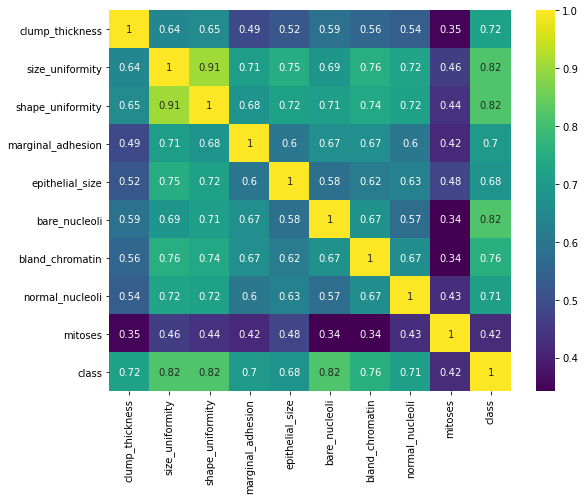

In [19]:
plt.figure(figsize=(9,7));
sns.heatmap(data=df.corr(),annot=True,cmap='viridis');

<IPython.core.display.Javascript object>

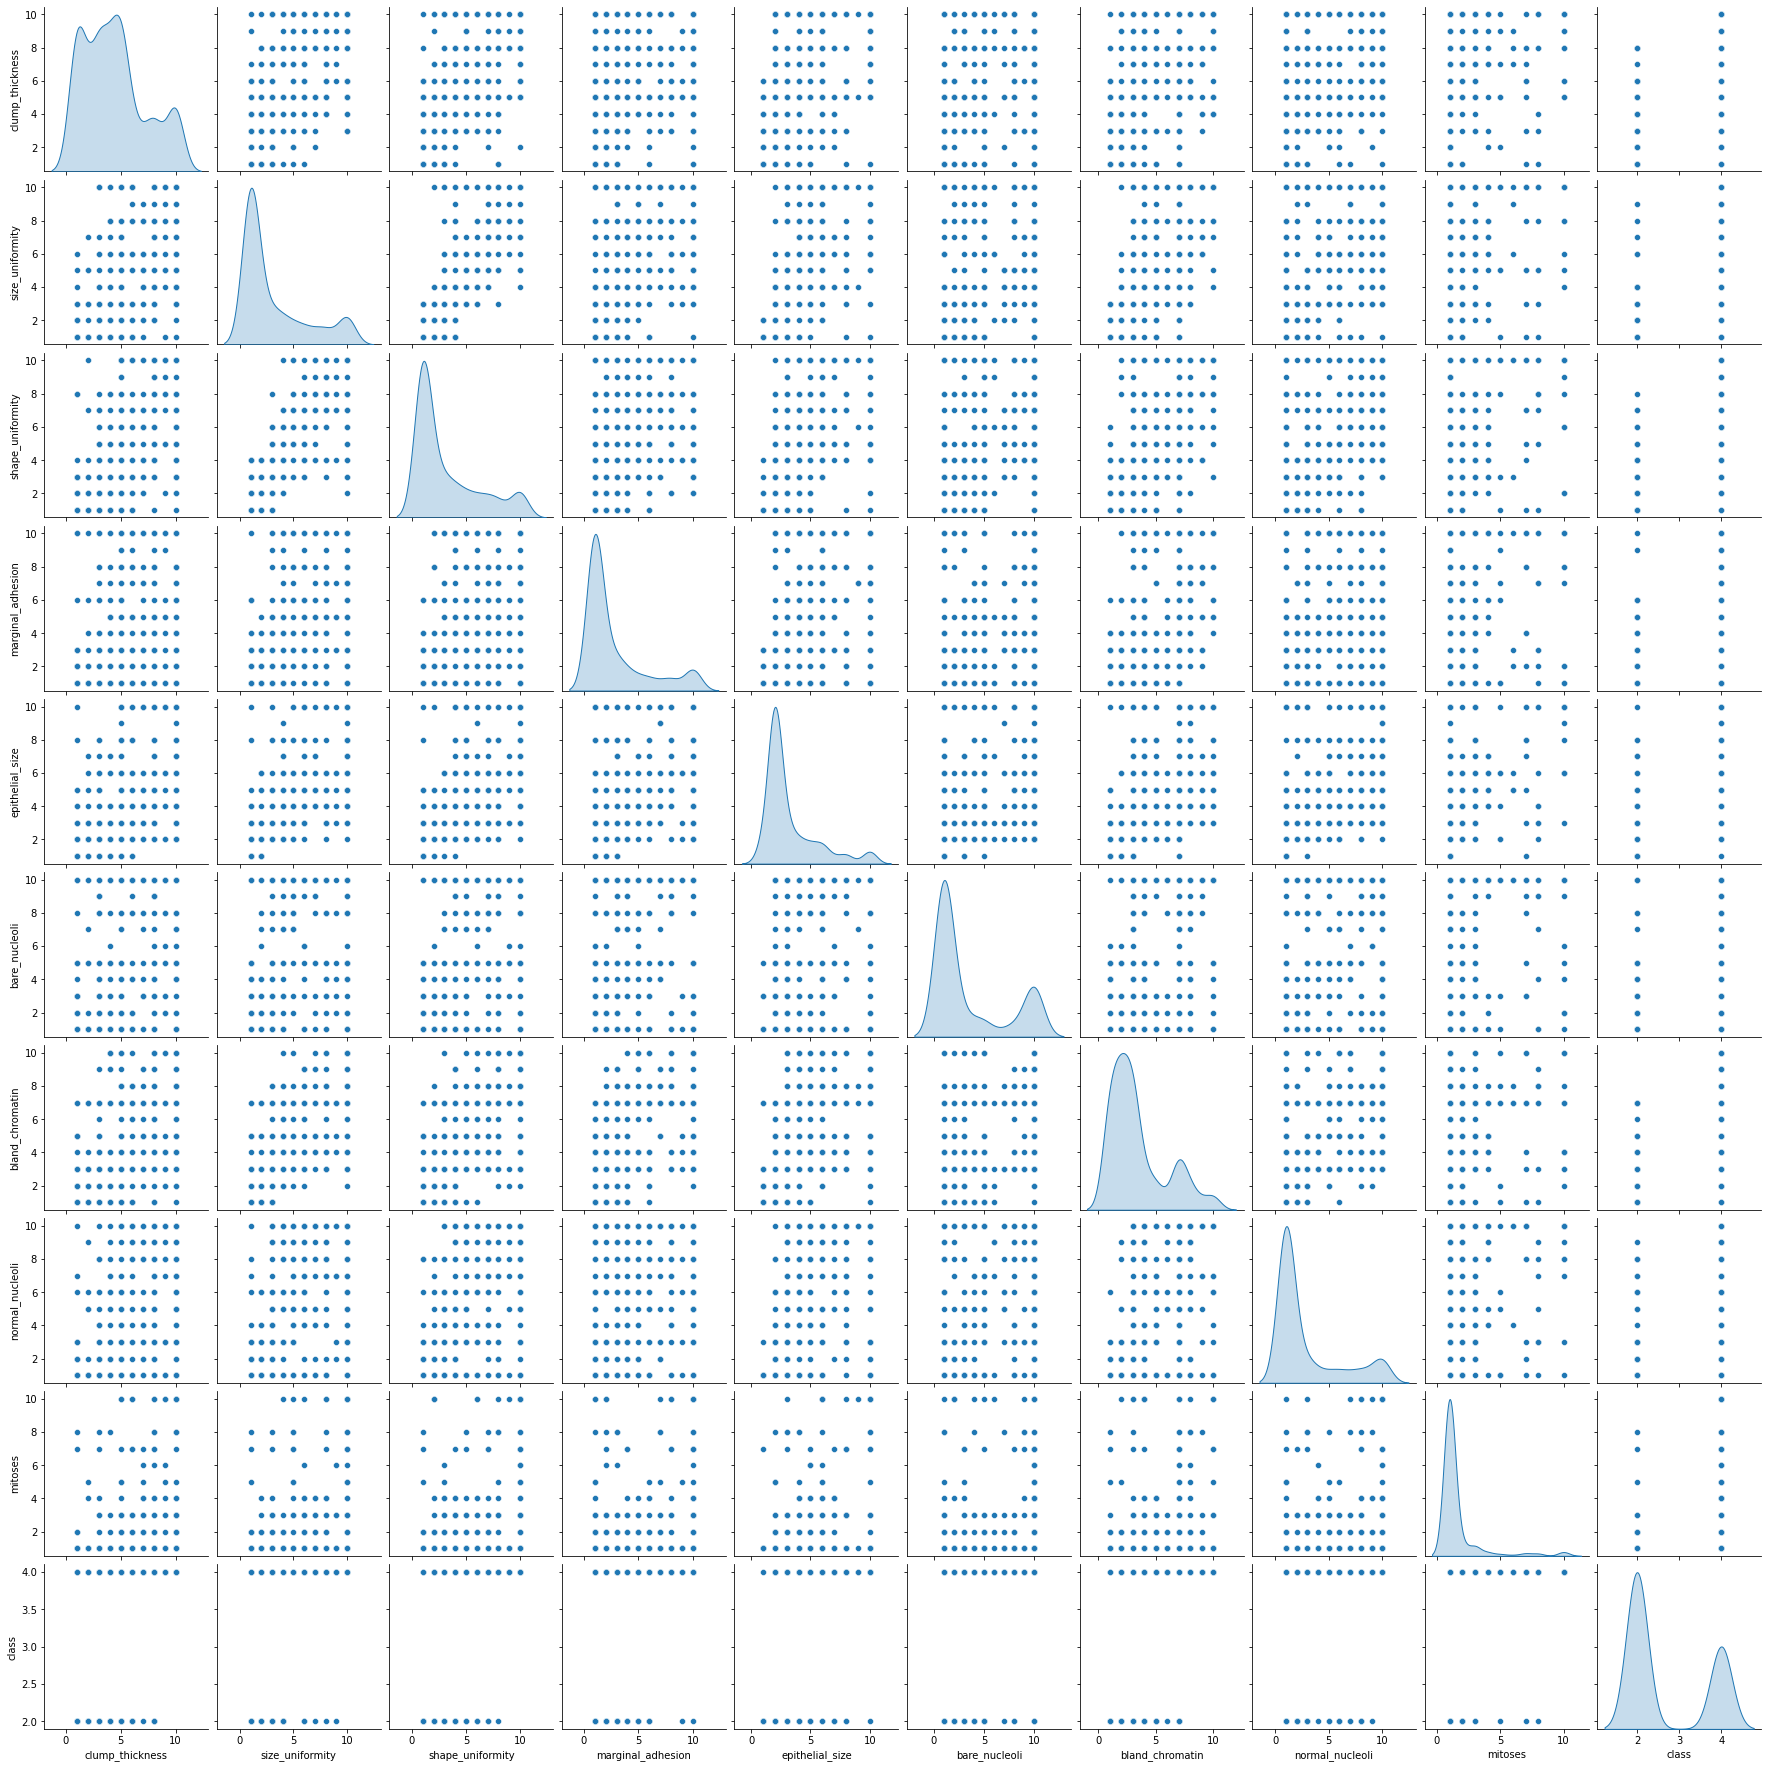

In [20]:
sns.pairplot(df,diag_kind='kde')

### Model Building

In [21]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [25]:
X = df.drop('class',axis=1)
X.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [29]:
y = df['class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

<IPython.core.display.Javascript object>

### KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [47]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [50]:
predicted_1 = KNN.predict(X_test)
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [62]:
from scipy.stats import zscore
print("KNN is predicting {0:.2f}% ".format(KNN.score(X_test,y_test)*100))

KNN is predicting 97.14% 


### Support Vector Classifire

In [66]:
from sklearn.svm import SVC

In [69]:
svc = SVC(gamma=0.025,C=3)
svc.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [71]:
predicted_2 = svc.predict(X_test)
predicted_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [75]:
from scipy.stats import zscore
print("SVC is predicting {0:.2f}% ".format(svc.score(X_test,y_test)*100))

SVC is predicting 98.10% 


In [76]:
KNNpredictions = pd.DataFrame(predicted_1)
SVCpredictions = pd.DataFrame(predicted_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
df1 = pd.concat([KNNpredictions,SVCpredictions], axis=1)

<IPython.core.display.Javascript object>

In [85]:
df1.columns = [["KNNpredictions","SVCpredictions"]]

In [87]:
df1.head()

,KNNpredictions,SVCpredictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2


In [88]:
from sklearn.metrics import classification_report

In [96]:
print("KNN classification_report\n\n",classification_report(y_test,predicted_1))

KNN classification_report

               precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [97]:
print("SVC classification_report\n\n",classification_report(y_test,predicted_2))

SVC classification_report

               precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [99]:
from sklearn import metrics

Confusion Metrics for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

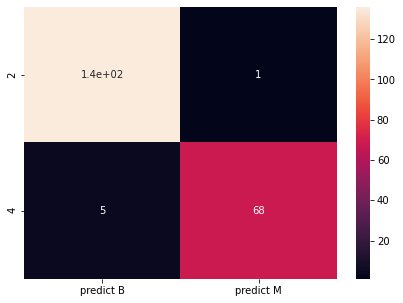

In [106]:
print("Confusion Metrics for KNN")

cm = metrics.confusion_matrix(y_test,predicted_1, labels=[2,4])

df_cm = pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ["predict B","predict M"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

Confusion Metrics for SVC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

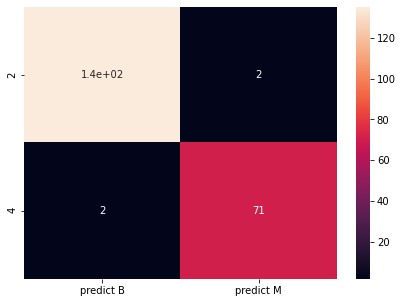

In [107]:
print("Confusion Metrics for SVC")

cm = metrics.confusion_matrix(y_test,predicted_2, labels=[2,4])

df_cm = pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ["predict B","predict M"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)